# Project - Finding the Best Markets to Advertise In

Let's assume that we're working for an an e-learning company that offers courses on programming. Most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc. We want to promote our product and we would like to invest some money in advertisement (ads). 

* Our __goal__ in this project is to find out the best markets to advertise our product in

To reach our goal, we could organize surveys for a couple of different markets to find out which would the best choices for advertising. This is very costly, however, and it's a good idea to explore cheaper options first.

One good candidate is the data from [freeCodeCamp's 2017 New Coder Survey](https://www.freecodecamp.org/news/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969/). [freeCodeCamp](https://www.freecodecamp.org/) is a free e-learning platform that offers courses on web development. Because they run a [popular Medium publication](https://medium.freecodecamp.org/) (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of our analysis.

The survey data is publicly available in this [GitHub repository](https://github.com/freeCodeCamp/2017-new-coder-survey). Let's explore the clean dataset (located in the [clean-data](https://github.com/freeCodeCamp/2017-new-coder-survey/tree/master/clean-data) folder):

In [1]:
import pandas as pd

file_location = "https://raw.githubusercontent.com/freeCodeCamp/2017-new-coder-survey/master/clean-data/2017-fCC-New-Coders-Survey-Data.csv"

survey = pd.read_csv(file_location, low_memory=False)

survey.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Columns: 136 entries, Age to YouTubeTheNewBoston
dtypes: float64(105), object(31)
memory usage: 18.9+ MB


In [2]:
survey.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
pd.options.display.max_columns = 150 # to avoid truncated output

survey.head()


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

In [4]:
survey.columns

Index(['Age', 'AttendedBootcamp', 'BootcampFinish', 'BootcampLoanYesNo',
       'BootcampName', 'BootcampRecommend', 'ChildrenNumber', 'CityPopulation',
       'CodeEventConferences', 'CodeEventDjangoGirls',
       ...
       'YouTubeFCC', 'YouTubeFunFunFunction', 'YouTubeGoogleDev',
       'YouTubeLearnCode', 'YouTubeLevelUpTuts', 'YouTubeMIT',
       'YouTubeMozillaHacks', 'YouTubeOther', 'YouTubeSimplilearn',
       'YouTubeTheNewBoston'],
      dtype='object', length=136)

In [5]:
i = 0
for col in survey.columns:
    
    unique_values = survey[col].unique()
    unique_cnt = len(unique_values)
    
    print( i, ">>>", col, "(", unique_cnt, ",", survey[col].dtype, ")" )
    
    i += 1
    
    if unique_cnt < 20:
        print( "\t", unique_values, "\n" )
        
    else:
        j = 1
        print( "\t Some values are:" )
        string = "\t"
        for val in unique_values:
            string += "'{}', ".format(val)
            j += 1
            if j == 11:
                print( string, "\n" )
                break



0 >>> Age ( 74 , float64 )
	 Some values are:
	'27.0', '34.0', '21.0', '26.0', '20.0', '28.0', '29.0', '23.0', '24.0', '22.0',  

1 >>> AttendedBootcamp ( 3 , float64 )
	 [ 0.  1. nan] 

2 >>> BootcampFinish ( 3 , float64 )
	 [nan  1.  0.] 

3 >>> BootcampLoanYesNo ( 3 , float64 )
	 [nan  0.  1.] 

4 >>> BootcampName ( 142 , object )
	 Some values are:
	'nan', 'Code Fellows', 'HackerYou', 'Epicodus', 'The Iron Yard', 'BrainStation', 'Codemaster Institute', 'Logit Academy', 'Le Wagon', 'Code 42',  

5 >>> BootcampRecommend ( 3 , float64 )
	 [nan  1.  0.] 

6 >>> ChildrenNumber ( 10 , float64 )
	 [nan  1.  2.  4.  3.  5.  6.  7.  8.  9.] 

7 >>> CityPopulation ( 4 , object )
	 ['more than 1 million' 'less than 100,000' 'between 100,000 and 1 million'
 nan] 

8 >>> CodeEventConferences ( 2 , float64 )
	 [nan  1.] 

9 >>> CodeEventDjangoGirls ( 2 , float64 )
	 [nan  1.] 

10 >>> CodeEventFCC ( 2 , float64 )
	 [nan  1.] 

11 >>> CodeEventGameJam ( 2 , float64 )
	 [nan  1.] 

12 >>> CodeEven

86 >>> PodcastJSJabber ( 2 , float64 )
	 [nan  1.] 

87 >>> PodcastNone ( 2 , float64 )
	 [nan  1.] 

88 >>> PodcastOther ( 576 , object )
	 Some values are:
	'nan', 'Codenewbie', 'Complete Developer', 'Immutable', 'Learn to code with me podcast', 'Breakingintostartups.com', 'Scott Hanselman', 'Laracast', 'Scale your code', 'Fragmented',  

89 >>> PodcastProgThrowdown ( 2 , float64 )
	 [nan  1.] 

90 >>> PodcastRubyRogues ( 2 , float64 )
	 [nan  1.] 

91 >>> PodcastSEDaily ( 2 , float64 )
	 [nan  1.] 

92 >>> PodcastSERadio ( 2 , float64 )
	 [nan  1.] 

93 >>> PodcastShopTalk ( 2 , float64 )
	 [nan  1.] 

94 >>> PodcastTalkPython ( 2 , float64 )
	 [nan  1.] 

95 >>> PodcastTheWebAhead ( 2 , float64 )
	 [nan  1.] 

96 >>> ResourceCodecademy ( 2 , float64 )
	 [ 1. nan] 

97 >>> ResourceCodeWars ( 2 , float64 )
	 [nan  1.] 

98 >>> ResourceCoursera ( 2 , float64 )
	 [nan  1.] 

99 >>> ResourceCSS ( 2 , float64 )
	 [nan  1.] 

100 >>> ResourceEdX ( 2 , float64 )
	 [nan  1.] 

101 >>> Resou

I have curiousity to see the distribution of two columns: `Age` and `SchoolDegree`.

### > `Age` Column

In [6]:
survey['Age'].describe()

count    15367.000000
mean        27.691872
std          8.559239
min          0.000000
25%         22.000000
50%         26.000000
75%         32.000000
max         90.000000
Name: Age, dtype: float64

In [7]:
survey['Age'].isnull().sum()

2808

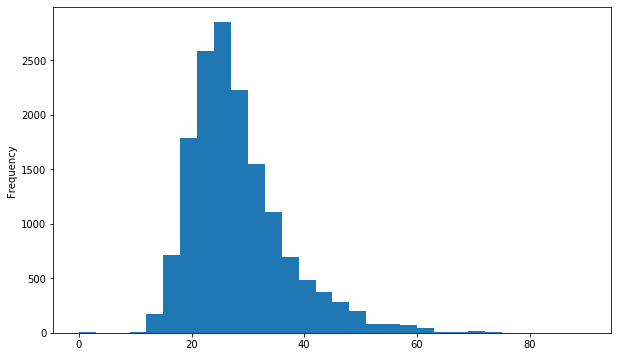

In [27]:
survey['Age'].plot.hist(bins=30, figsize=(10,6))

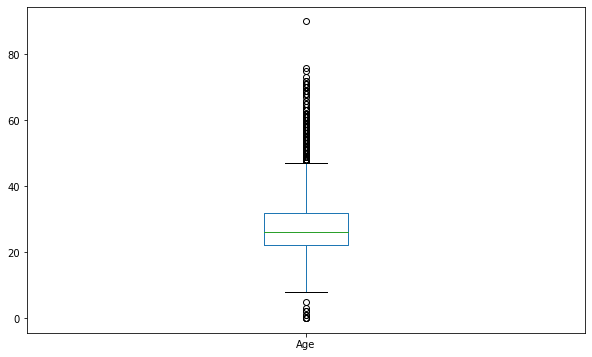

In [9]:
survey['Age'].plot.box(figsize=(10,6))

In [10]:
survey['Age'].value_counts(bins=4).sort_index(ascending=False)

(67.5, 90.0]         23
(45.0, 67.5]        651
(22.5, 45.0]      10297
(-0.091, 22.5]     4396
Name: Age, dtype: int64

### > `SchoolDegree` Column

In [11]:
survey['SchoolDegree'].describe()

count                 15368
unique                   10
top       bachelor's degree
freq                   5851
Name: SchoolDegree, dtype: object

In [12]:
survey['SchoolDegree'].isnull().sum()

2807

In [13]:
survey['SchoolDegree'].value_counts(dropna=False)

bachelor's degree                           5851
NaN                                         2807
some college credit, no degree              2602
high school diploma or equivalent (GED)     1872
master's degree (non-professional)          1468
some high school                            1112
professional degree (MBA, MD, JD, etc.)      777
associate's degree                           641
trade, technical, or vocational training     504
no high school (secondary school)            408
Ph.D.                                        133
Name: SchoolDegree, dtype: int64

In [14]:
survey['SchoolDegree'].value_counts(dropna=False, normalize=True)

bachelor's degree                           0.321926
NaN                                         0.154443
some college credit, no degree              0.143164
high school diploma or equivalent (GED)     0.102999
master's degree (non-professional)          0.080770
some high school                            0.061183
professional degree (MBA, MD, JD, etc.)     0.042751
associate's degree                          0.035268
trade, technical, or vocational training    0.027730
no high school (secondary school)           0.022448
Ph.D.                                       0.007318
Name: SchoolDegree, dtype: float64

Text(0.5, 0, 'Number of Respondents')

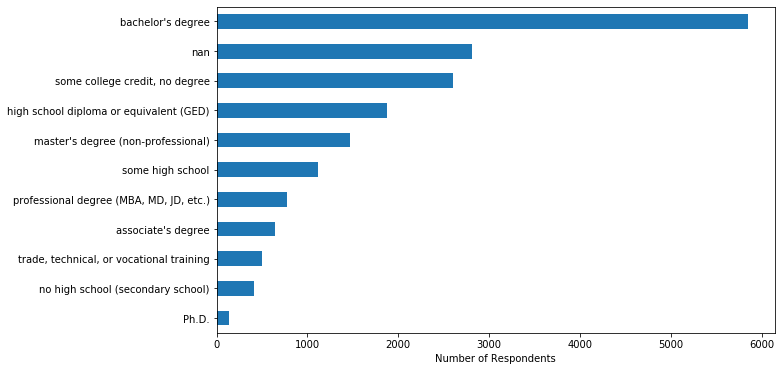

In [28]:
s = survey['SchoolDegree'].value_counts(dropna=False, ascending=True)


import matplotlib.pyplot as plt

s.plot.barh(figsize=(10,6))

plt.xlabel('Number of Respondents')


## Checking for Sample Representativity

As we mentioned earlier, most of the courses we offer are on __web and mobile development__, but we also cover many other domains, like data science, game development, etc. For the purpose of our analysis, we want to answer questions about a population of new coders that are interested in the subjects we teach. We'd like to know:

- Where are these new coders located?


- What are the locations with the greatest number of new coders?


- How much money new coders are willing to spend on learning?

__First__ we need to __figure out whether the sample we have is representative for our population of interest__ and if it has the right categories of people for our purpose.

### > `JobRoleInterest` Column

Let's explore the `JobRoleInterest` column which describes for every participant the role(s) they'd be interested in working.

In [29]:
print( survey["JobRoleInterest"].value_counts(dropna=False) )

NaN                                                                                                                            11183
Full-Stack Web Developer                                                                                                         823
  Front-End Web Developer                                                                                                        450
  Data Scientist                                                                                                                 152
Back-End Web Developer                                                                                                           142
                                                                                                                               ...  
Back-End Web Developer,   Data Scientist, Data Engineer,   Front-End Web Developer, Full-Stack Web Developer                       1
  DevOps / SysAdmin, Back-End Web Developer,   Front-End Web Develope

In [30]:
survey["JobRoleInterest"].value_counts(dropna=False).head(20)

NaN                                                                            11183
Full-Stack Web Developer                                                         823
  Front-End Web Developer                                                        450
  Data Scientist                                                                 152
Back-End Web Developer                                                           142
  Mobile Developer                                                               117
Game Developer                                                                   114
Information Security                                                              92
Full-Stack Web Developer,   Front-End Web Developer                               64
  Front-End Web Developer, Full-Stack Web Developer                               56
  Product Manager                                                                 55
Data Engineer                                                    

In [31]:
survey["JobRoleInterest"].value_counts(dropna=False, normalize=True).head(20)

NaN                                                                            0.615296
Full-Stack Web Developer                                                       0.045282
  Front-End Web Developer                                                      0.024759
  Data Scientist                                                               0.008363
Back-End Web Developer                                                         0.007813
  Mobile Developer                                                             0.006437
Game Developer                                                                 0.006272
Information Security                                                           0.005062
Full-Stack Web Developer,   Front-End Web Developer                            0.003521
  Front-End Web Developer, Full-Stack Web Developer                            0.003081
  Product Manager                                                              0.003026
Data Engineer                   

Let's consider the people (respondents) who answered this question.

- Where a participant didn't respond, we can't know for sure what their interests are

In [32]:
survey["JobRoleInterest"].value_counts().head(20)

Full-Stack Web Developer                                                       823
  Front-End Web Developer                                                      450
  Data Scientist                                                               152
Back-End Web Developer                                                         142
  Mobile Developer                                                             117
Game Developer                                                                 114
Information Security                                                            92
Full-Stack Web Developer,   Front-End Web Developer                             64
  Front-End Web Developer, Full-Stack Web Developer                             56
  Product Manager                                                               55
Data Engineer                                                                   53
  User Experience Designer                                                      52
  Us

In [33]:
survey["JobRoleInterest"].value_counts(normalize=True).head(20) * 100

Full-Stack Web Developer                                                       11.770595
  Front-End Web Developer                                                       6.435927
  Data Scientist                                                                2.173913
Back-End Web Developer                                                          2.030892
  Mobile Developer                                                              1.673341
Game Developer                                                                  1.630435
Information Security                                                            1.315789
Full-Stack Web Developer,   Front-End Web Developer                             0.915332
  Front-End Web Developer, Full-Stack Web Developer                             0.800915
  Product Manager                                                               0.786613
Data Engineer                                                                   0.758009
  User Experience Des

__Notice__ that a user (respondant) who is interested in __web development__ could have answered, for example:

- Full-Stack Web Developer


- Front-End Web Developer


- Back-End Web Developer


- Front-End Web Developer, Back-End Web Developer, Full-Stack Web Developer

First, let's remove the missing/null values:

In [34]:
print("Dataframe dimensions:", survey.shape)

JobRoleInterest_non_nulls = survey["JobRoleInterest"].dropna()

print("Number of rows of 'JobRoleInterest' series after removing the null values:", \
      JobRoleInterest_non_nulls.shape)


Dataframe dimensions: (18175, 136)
Number of rows of 'JobRoleInterest' series after removing the null values: (6992,)


### Next,
I want to know the number of occurrences of each __particular__ _Role_ in the `JobRoleInterest` column:

Let's use the `split` method to extract each __particular__ _Role_.

In [35]:
pattern = r",\s+"

s1 = JobRoleInterest_non_nulls.str.split(pattern)


In [40]:
s1

1                               [Full-Stack Web Developer]
2        [  Front-End Web Developer, Back-End Web Devel...
3        [  Front-End Web Developer, Full-Stack Web Dev...
4        [Full-Stack Web Developer, Information Securit...
6                               [Full-Stack Web Developer]
                               ...                        
18161                           [Full-Stack Web Developer]
18162    [  Data Scientist, Game Developer, Quality Ass...
18163    [Back-End Web Developer, Data Engineer, Data S...
18171    [  DevOps / SysAdmin, Mobile Developer, Produc...
18174    [Back-End Web Developer, Data Engineer, Data S...
Name: JobRoleInterest, Length: 6992, dtype: object

In [44]:
def generate_roles_dict(list_):
    
    for string in list_:
        
        string_2 = string.strip()
        
        if string_2 in JobRoleInterest_dict:
            JobRoleInterest_dict[string_2] += 1
        else:
            JobRoleInterest_dict[string_2] = 1



In [45]:
JobRoleInterest_dict = {}

s1.apply(generate_roles_dict)


1        None
2        None
3        None
4        None
6        None
         ... 
18161    None
18162    None
18163    None
18171    None
18174    None
Name: JobRoleInterest, Length: 6992, dtype: object

In [46]:
print("Number of items in the Dictionary:", len(JobRoleInterest_dict))

Number of items in the Dictionary: 208


In [50]:
for key, value in JobRoleInterest_dict.items():
    print(key, ":", value)


Full-Stack Web Developer : 4198
Front-End Web Developer : 3533
Back-End Web Developer : 2772
DevOps / SysAdmin : 927
Mobile Developer : 2304
Information Security : 1326
Quality Assurance Engineer : 498
Game Developer : 1628
User Experience Designer : 1469
Data Scientist : 1643
Data Engineer : 1248
Product Manager : 814
Ethical Hacker : 2
security expert : 1
Technical Writer : 1
Researcher : 2
Systems Engineer : 1
Desktop Applications Programmer : 1
Robotics : 1
Non technical : 1
UI Design : 1
Software engineer : 4
email coder : 1
Data analyst : 1
I dont yet know : 1
UX developer/designer : 1
support scientific resaerch : 1
AI and neuroscience : 1
Full Stack Software Engineer : 1
Program Manager : 1
Application Support Analyst : 1
This futurist's dream of using some tech in a way that inspires critical amounts of people to influence the changes we need to protect : 1
Information Architect : 1
Physicist : 1
Security Business Analyst : 1
Bioinformatics/science : 1
creative coder / generat

## > Sort a dictionary:


In [51]:
for word in sorted(JobRoleInterest_dict, key=JobRoleInterest_dict.get, reverse=True):
    print(word, ":", JobRoleInterest_dict[word])


Full-Stack Web Developer : 4198
Front-End Web Developer : 3533
Back-End Web Developer : 2772
Mobile Developer : 2304
Data Scientist : 1643
Game Developer : 1628
User Experience Designer : 1469
Information Security : 1326
Data Engineer : 1248
DevOps / SysAdmin : 927
Product Manager : 814
Quality Assurance Engineer : 498
Software Engineer : 11
Software Developer : 6
Software engineer : 4
Artificial Intelligence : 4
Machine Learning Engineer : 3
Desktop Application Developer : 3
Ethical Hacker : 2
Researcher : 2
Research : 2
Business Analyst : 2
Java developer : 2
Bioinformatics : 2
Data Analyst : 2
Web Designer : 2
data analyst : 2
Machine Learning : 2
Product Designer : 2
programmer : 2
User Interface Designer : 2
Unsure : 2
Not sure yet : 2
Not sure : 2
Programmer : 2
Project Manager : 2
undecided : 2
security expert : 1
Technical Writer : 1
Systems Engineer : 1
Desktop Applications Programmer : 1
Robotics : 1
Non technical : 1
UI Design : 1
email coder : 1
Data analyst : 1
I dont yet 

### Now,
Let's see the above numbers in __percentages__:

In [52]:
for word in sorted(JobRoleInterest_dict, key=JobRoleInterest_dict.get, reverse=True):
    print(word, ":", JobRoleInterest_dict[word] / 6992 * 100)


Full-Stack Web Developer : 60.04004576659039
Front-End Web Developer : 50.52917620137299
Back-End Web Developer : 39.64530892448512
Mobile Developer : 32.951945080091534
Data Scientist : 23.498283752860413
Game Developer : 23.283752860411898
User Experience Designer : 21.009725400457665
Information Security : 18.96453089244851
Data Engineer : 17.84897025171625
DevOps / SysAdmin : 13.25800915331808
Product Manager : 11.641876430205949
Quality Assurance Engineer : 7.1224256292906185
Software Engineer : 0.15732265446224256
Software Developer : 0.08581235697940504
Software engineer : 0.057208237986270026
Artificial Intelligence : 0.057208237986270026
Machine Learning Engineer : 0.04290617848970252
Desktop Application Developer : 0.04290617848970252
Ethical Hacker : 0.028604118993135013
Researcher : 0.028604118993135013
Research : 0.028604118993135013
Business Analyst : 0.028604118993135013
Java developer : 0.028604118993135013
Bioinformatics : 0.028604118993135013
Data Analyst : 0.02860411

### > Conclusion:
We can see in the above cell the job roles that participants (respondents) are most interested in working in.

* 60 % of respondents are interested in Full-Stack __Web Development__


* 50 % of respondents are interested in Front-End __Web Development__


* 40 % of respondents are interested in Back-End __Web Development__


* 33 % of respondents are interested in __Mobile Development__


As we mentioned earlier, most of the courses we offer are on __web and mobile development__, but we also cover many other domains, like data science, game development, etc.

### Next, 
Let's find out how many respondents chose at least one of these two options (__web or mobile development__):

In [53]:
JobRoleInterest_non_nulls.head(10)

1                              Full-Stack Web Developer
2       Front-End Web Developer, Back-End Web Develo...
3       Front-End Web Developer, Full-Stack Web Deve...
4     Full-Stack Web Developer, Information Security...
6                              Full-Stack Web Developer
9     Full-Stack Web Developer,   Quality Assurance ...
11      DevOps / SysAdmin,   Data Scientist, Informa...
13    Back-End Web Developer, Full-Stack Web Develop...
14                             Full-Stack Web Developer
15                             Full-Stack Web Developer
Name: JobRoleInterest, dtype: object

In [54]:
JobRoleInterest_non_nulls.loc[11]

'  DevOps / SysAdmin,   Data Scientist, Information Security, Data Engineer'

In [55]:
pattern = r"Web|Mobile Developer"

web_or_mobile = JobRoleInterest_non_nulls.str.contains(pattern)

print( web_or_mobile.head(10) )


1      True
2      True
3      True
4      True
6      True
9      True
11    False
13     True
14     True
15     True
Name: JobRoleInterest, dtype: bool


In [56]:
web_or_mobile.value_counts()

True     6034
False     958
Name: JobRoleInterest, dtype: int64

In [57]:
web_or_mobile.value_counts(normalize=True) * 100

True     86.298627
False    13.701373
Name: JobRoleInterest, dtype: float64

In [58]:
freq_table = web_or_mobile.value_counts(normalize=True) * 100


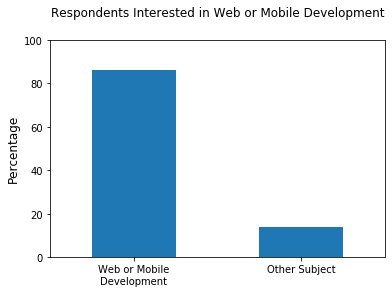

In [59]:
#import matplotlib.pyplot as plt

freq_table.plot.bar()

plt.title('Respondents Interested in Web or Mobile Development', y = 1.08) # y pads the title upward

#plt.ylabel('Percentage')
plt.ylabel('Percentage', fontsize = 12)

plt.xticks( [0,1], ['Web or Mobile\nDevelopment', 'Other Subject'], rotation=0 )

plt.ylim([0,100])


plt.show()


### > Conclusion:

The above percentages give us a good reason to consider this sample as __representative__ for our population of interest.

## New Coders (Respondents) - Locations and Densities

Now that we found out that the sample has the right categories of people for our purpose, we can begin analyzing it. We can start with finding out where these new coders are located, and what are the densities (how many coders there are) for each location.

The data set provides information about the location of each participant at a country level. The `CountryCitizen` variable describes the country of origin for each participant, and the `CountryLive` variable describes what country each participants lives in (which may be different than the origin country).

For our analysis, we'll work with the `CountryLive` variable because we're interested where people actually live at the moment when we run the ads.

__Because the data set provides information at a country level, we can think of each country as an individual market.__ 

This means we can reframe our __GOAL__ as:

### - Find the best two markets (countries) to advertise our product in


One indicator of a good market is the number of potential customers — the more potential customers in a market, the better. If our ads manage to convince 10% of the 5,000 potential customers in market A to buy our product, then this is better than convincing 100% of the 30 potential customers in market B.

In [60]:
survey_1 = survey.dropna(subset=['JobRoleInterest'])

survey_1.shape


(6992, 136)

In [61]:
survey_1["CountryLive"].value_counts(dropna=False)

United States of America    3125
India                        528
United Kingdom               315
Canada                       260
NaN                          154
                            ... 
Vanuatu                        1
Cameroon                       1
Anguilla                       1
Bolivia                        1
Yemen                          1
Name: CountryLive, Length: 138, dtype: int64

In [62]:
survey_1["CountryLive"].value_counts(dropna=False, normalize=True) * 100

United States of America    44.693936
India                        7.551487
United Kingdom               4.505149
Canada                       3.718535
NaN                          2.202517
                              ...    
Vanuatu                      0.014302
Cameroon                     0.014302
Anguilla                     0.014302
Bolivia                      0.014302
Yemen                        0.014302
Name: CountryLive, Length: 138, dtype: float64

In [63]:
# Let's create a frequency distribution table with the absolute and relative frequencies
absolute_frequencies = survey_1["CountryLive"].value_counts()

relative_frequencies = survey_1["CountryLive"].value_counts(normalize=True) * 100


df = pd.DataFrame( data = {'Absolute Frequency': absolute_frequencies,
                      'Relative Frequency': relative_frequencies} )


df


,Absolute Frequency,Relative Frequency
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
...,...,...
Turkmenistan,1,0.014624
Botswana,1,0.014624
Sudan,1,0.014624
Cayman Islands,1,0.014624


In [64]:
df.head(20)

,Absolute Frequency,Relative Frequency
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
Brazil,129,1.886517
Germany,125,1.828020
Australia,112,1.637906
Russia,102,1.491664
Ukraine,89,1.301550


In the above table we can see that

- 45.7% of our potential customers are located in the US


- India has 7.7% which is not very far from the United Kingdom (4.6%) and Canada (3.8%)

We need to go more in depth with our analysis before taking a decision (i.e. conclude which are the two best markets).

## Spending Money for Learning

We can continue by figuring out __how much money new coders are actually willing to spend on learning.__ Advertising within markets where most people are only willing to learn for free is extremely unlikely to be profitable for us.

The `MoneyForLearning` column describes in American dollars the amount of money spent by participants from the moment they started coding until the moment they completed the survey. 

- __Our company sells subscriptions at a price of $59 per month__, and for this reason we're interested in finding out how much money each student spends _per month_.

__Note:__
I am not considering the `Income` column because it answers the question: _"About how much money do you expect to earn per year at your first developer job (in US Dollars)?"_.

It also seems like a good idea to narrow down our analysis to only four countries: the US, India, United Kingdom, and Canada. Two reasons for this decision are:

1. These are the countries having the highest absolute frequencies in our sample, which means we have a decent amount of data for each.


2. Our courses are written in English, and English is an official language in all these four countries. The more people that know English, the better our chances to target the right people with our ads.

In [65]:
pattern = r"(United States of America)|(India)|(United Kingdom)|(Canada)"

top_4_countries_bool = survey_1['CountryLive'].str.contains(pattern)

print(top_4_countries_bool)


1         True
2         True
3        False
4        False
6         True
         ...  
18161    False
18162    False
18163     True
18171    False
18174     True
Name: CountryLive, Length: 6992, dtype: object


C:\Users\helen\Anaconda3\lib\site-packages\pandas\core\strings.py:1843: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [66]:
top_4_countries_bool.value_counts(dropna=False)

True     4228
False    2610
NaN       154
Name: CountryLive, dtype: int64

Let's replace __NaN__ values with __False__:

In [67]:
top_4_countries_bool = survey_1['CountryLive'].str.contains(pattern, na=False)

In [68]:
top_4_countries_bool.value_counts(dropna=False)

True     4228
False    2764
Name: CountryLive, dtype: int64

`survey_3` data set contains people (respondents) who are located in: US, India, United Kingdom, or Canada.

In [69]:
survey_3 = survey_1[top_4_countries_bool].copy()

survey_3.shape


(4228, 136)

### > MoneyForLearning column:

The question of the survey from `MoneyForLearning` was _"Aside from university tuition, about how much money have you spent on learning to code so far (in US dollars)?"_

In [80]:
survey_3['MoneyForLearning'].describe()

count      4007.000000
mean       1100.358622
std        5745.662137
min           0.000000
25%           0.000000
50%          20.000000
75%         250.000000
max      200000.000000
Name: MoneyForLearning, dtype: float64

In [81]:
survey_3['MoneyForLearning'].isnull().sum()

221

In [82]:
mean = survey_3['MoneyForLearning'].mean()
print("mean:", mean)

std_dev = survey_3['MoneyForLearning'].std(ddof = 0)
print("\nstd_dev:", std_dev)


mean: 1100.3586224107812

std_dev: 5744.945139057177


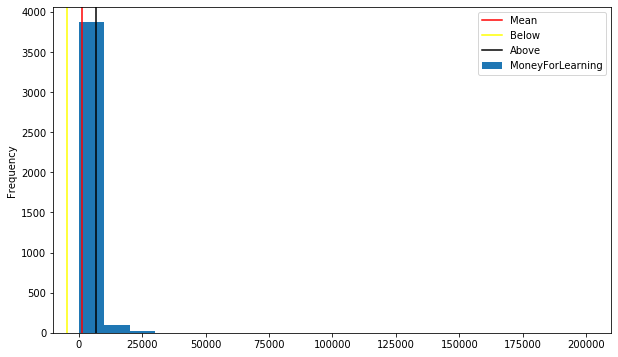

In [83]:
#import matplotlib.pyplot as plt

survey_3['MoneyForLearning'].plot.hist(bins=20, figsize=(10,6))

plt.axvline(mean, color="red", label="Mean")

plt.axvline(mean - std_dev, color="yellow", label="Below")

plt.axvline(mean + std_dev, color="black", label="Above")

plt.legend()


Zoom in:

(0, 28000)

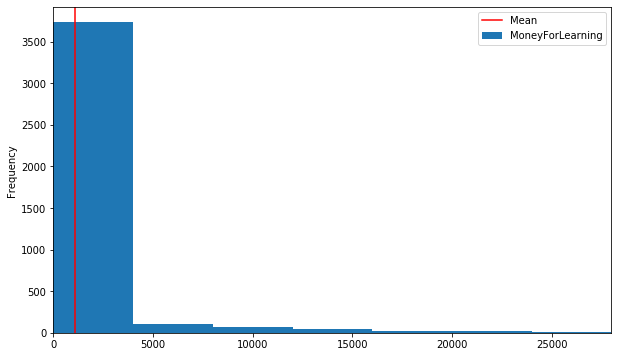

In [85]:
survey_3['MoneyForLearning'].plot.hist(bins=50, figsize=(10,6))

plt.axvline(mean, color="red", label="Mean")

#plt.axvline(mean - std_dev, color="yellow", label="Below")

#plt.axvline(mean + std_dev, color="black", label="Above")

plt.legend()

plt.xlim(0,28000)


(0, 5000)

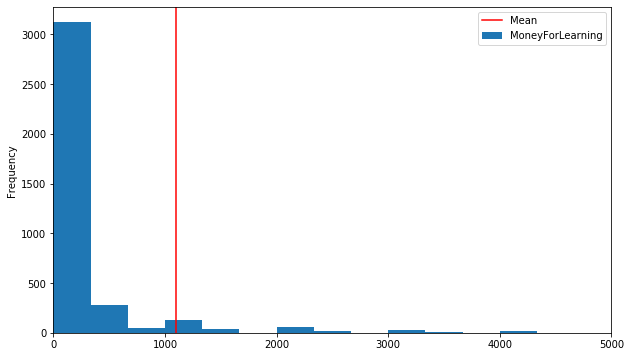

In [94]:
survey_3['MoneyForLearning'].plot.hist(bins=600, figsize=(10,6))

plt.axvline(mean, color="red", label="Mean")

#plt.axvline(mean - std_dev, color="yellow", label="Below")

#plt.axvline(mean + std_dev, color="black", label="Above")

plt.legend()

plt.xlim(0,5000)


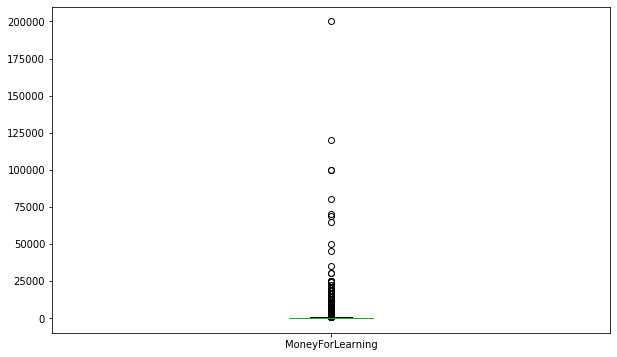

In [95]:
#survey_3['MoneyForLearning'].plot.box()
survey_3['MoneyForLearning'].plot.box(figsize=(10,6))


Zoom in:

(0, 1000)

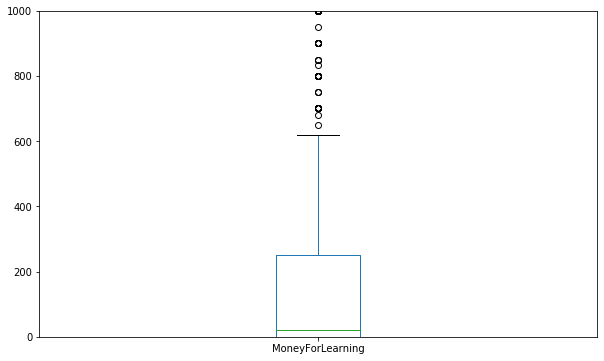

In [96]:
survey_3['MoneyForLearning'].plot.box(figsize=(10,6))

plt.ylim(0,1000)


In [97]:
median = survey_3['MoneyForLearning'].median()
print("median:", median)

mode = survey_3['MoneyForLearning'].mode()
print("\nmode:", mode)

print( type(mode) )


median: 20.0

mode: 0    0.0
dtype: float64
<class 'pandas.core.series.Series'>


### > MonthsProgramming column:

In [98]:
survey_3['MonthsProgramming'].describe()

count    4049.000000
mean       13.880464
std        31.560783
min         0.000000
25%         2.000000
50%         6.000000
75%        15.000000
max       744.000000
Name: MonthsProgramming, dtype: float64

In [99]:
survey_3['MonthsProgramming'].isnull().sum()

179

In [100]:
survey_3['MonthsProgramming'].value_counts(dropna=False)

1.0      480
2.0      401
6.0      397
12.0     386
3.0      380
        ... 
408.0      1
39.0       1
73.0       1
49.0       1
300.0      1
Name: MonthsProgramming, Length: 81, dtype: int64

In [101]:
survey_3['MonthsProgramming'].value_counts(dropna=False).head(15)

1.0     480
2.0     401
6.0     397
12.0    386
3.0     380
24.0    267
4.0     209
NaN     179
36.0    162
5.0     156
0.0     150
8.0     132
18.0     92
10.0     83
7.0      72
Name: MonthsProgramming, dtype: int64

In [102]:
survey_3['MonthsProgramming'].value_counts(dropna=False).sort_index()

0.0      150
1.0      480
2.0      401
3.0      380
4.0      209
        ... 
360.0      3
408.0      1
480.0      2
744.0      3
NaN      179
Name: MonthsProgramming, Length: 81, dtype: int64

From the above cell, we can see that some participants (150) answered that they had been learning to code for `0` months (it might be that they had just started when they completed the survey).

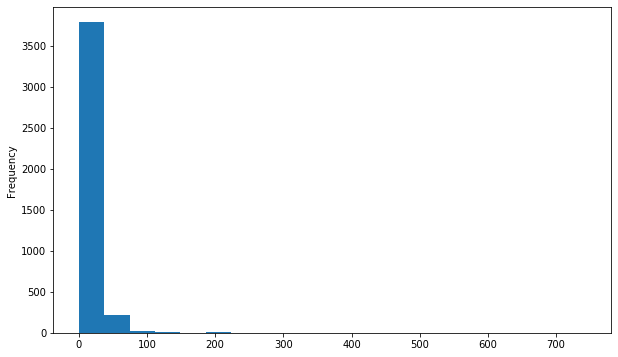

In [103]:
survey_3['MonthsProgramming'].plot.hist(bins=20, figsize=(10,6))

Zoom in:

(0, 80)

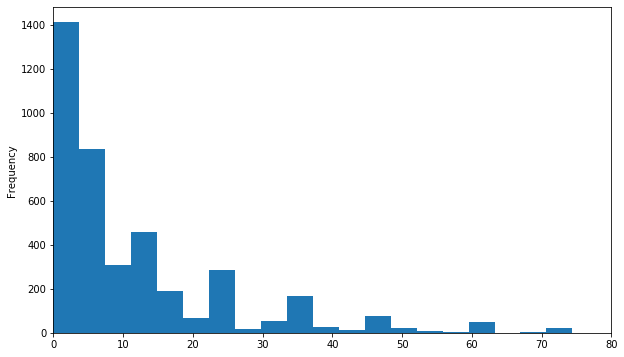

In [107]:
survey_3['MonthsProgramming'].plot.hist(bins=200, figsize=(10,6))

plt.xlim(0,80)


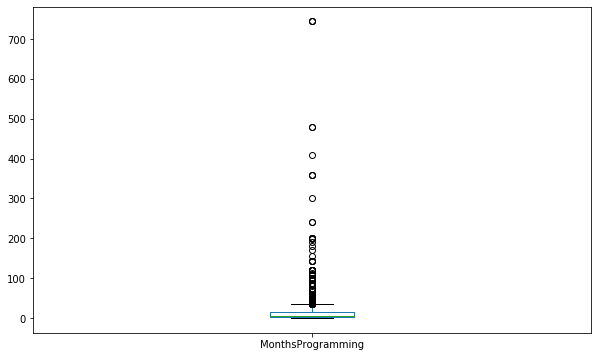

In [108]:
survey_3['MonthsProgramming'].plot.box(figsize=(10,6))


Zoom in:

(0, 80)

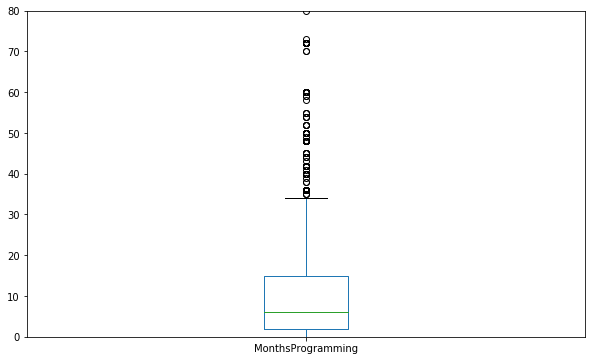

In [109]:
survey_3['MonthsProgramming'].plot.box(figsize=(10,6))

plt.ylim(0,80)


### Next,
Let's create a new column called `spent_per_month` that describes the amount of money a participant (respondent) has spent per month (at the moment they completed the survey).

* Some participants answered that they had been learning to code for 0 months (it might be that they had just started when they completed the survey). To avoid dividing by 0, let's replace all the values of 0 with 1.

In [70]:
survey_3['MonthsProgramming'].value_counts(dropna=False).sort_index()

0.0      150
1.0      480
2.0      401
3.0      380
4.0      209
        ... 
360.0      3
408.0      1
480.0      2
744.0      3
NaN      179
Name: MonthsProgramming, Length: 81, dtype: int64

In [71]:
survey_3['MonthsProgramming'].replace(0, 1, inplace=True)


In [72]:
survey_3['MonthsProgramming'].value_counts(dropna=False).sort_index()


1.0      630
2.0      401
3.0      380
4.0      209
5.0      156
        ... 
360.0      3
408.0      1
480.0      2
744.0      3
NaN      179
Name: MonthsProgramming, Length: 80, dtype: int64

In [73]:
survey_3['spent_per_month'] = survey_3['MoneyForLearning'] / survey_3['MonthsProgramming']

survey_3['spent_per_month'].describe()


count     3915.000000
mean       196.990196
std       1701.091730
min          0.000000
25%          0.000000
50%          2.000000
75%         40.000000
max      80000.000000
Name: spent_per_month, dtype: float64

In [74]:
survey_3['spent_per_month'].isnull().sum()

313

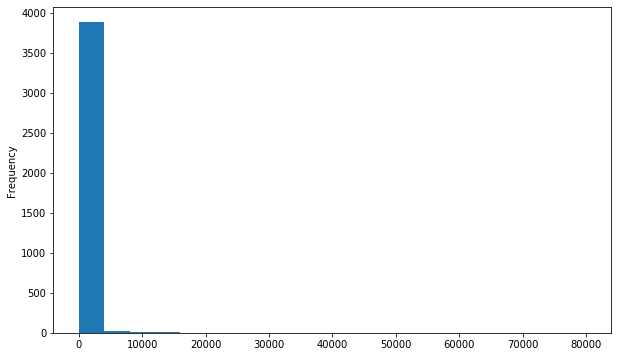

In [77]:
survey_3['spent_per_month'].plot.hist(bins=20, figsize=(10,6))

Zoom in:

(0, 1000)

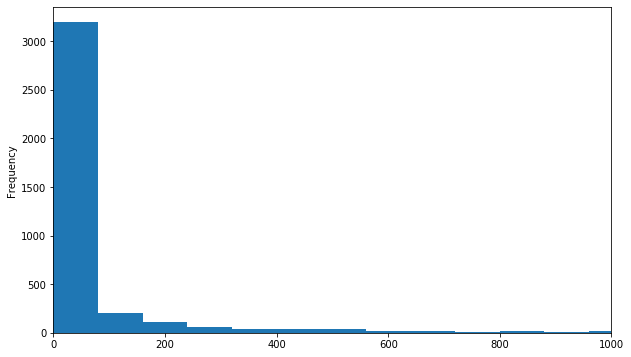

In [87]:
survey_3['spent_per_month'].plot.hist(bins=1000, figsize=(10,6))

plt.xlim(0,1000)


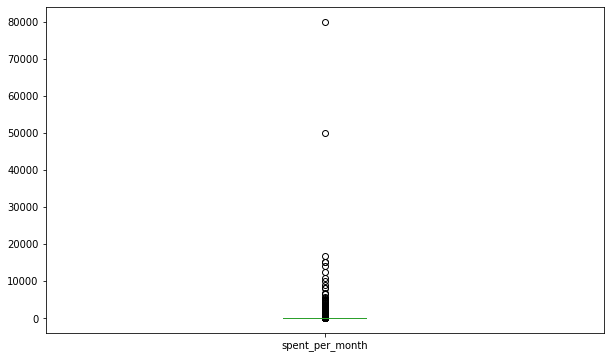

In [88]:
survey_3['spent_per_month'].plot.box(figsize=(10,6))


(0, 600)

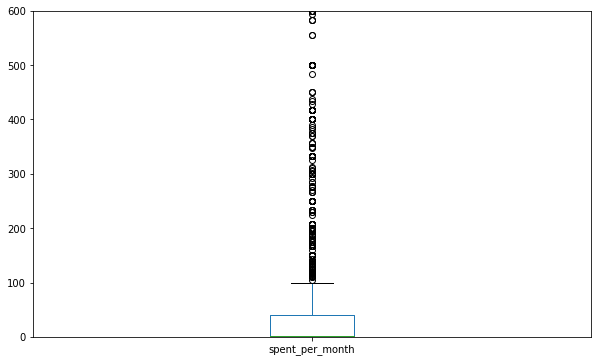

In [90]:
survey_3['spent_per_month'].plot.box(figsize=(10,6))

plt.ylim(0,600)


### Before dealing with the outliers,
Let's find out how much money a participant spends on average each month in the US, India, United Kingdom, and Canada.

__First__, I will proceed with a data set without __null values__ (aka missing values) in the `spent_per_month` column. The impact is low since they represent only the __7.4 %__ (313 out of 4,228).

In [93]:
survey_4 = survey_3[ survey_3['spent_per_month'].notnull() ].copy()

survey_4.shape


(3915, 137)

In [94]:
survey_4['CountryLive'].value_counts(dropna=False)

United States of America    2933
India                        463
United Kingdom               279
Canada                       240
Name: CountryLive, dtype: int64

In [105]:
survey_4['CountryLive'].value_counts(normalize=True) * 100

United States of America    74.916986
India                       11.826309
United Kingdom               7.126437
Canada                       6.130268
Name: CountryLive, dtype: float64

In [95]:
grouped = survey_4.groupby('CountryLive')

In [97]:
grouped.size()


CountryLive
Canada                       240
India                        463
United Kingdom               279
United States of America    2933
dtype: int64

In [98]:
grouped.mean()


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampRecommend,ChildrenNumber,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,ExpectedEarning,FinanciallySupporting,FirstDevJob,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobRelocateYesNo,MoneyForLearning,MonthsProgramming,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeSimplilearn,YouTubeTheNewBoston,spent_per_month
CountryLive,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Canada,26.924686,0.037657,0.625000,0.222222,0.555556,1.888889,1.0,NaN,1.0,1.0,NaN,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,51474.200913,0.324324,NaN,0.777778,0.485356,0.155462,0.957983,0.241379,0.037975,0.747826,214703.650000,16.083333,32227.623762,0.382353,0.025424,0.0,0.596639,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.723958,831.366667,11.887500,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,19582.951807,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,113.510961
India,21.458515,0.015184,0.166667,0.166667,0.833333,1.333333,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,64741.656471,0.408163,NaN,0.122449,0.144420,0.106291,0.724512,0.234375,0.004357,0.569231,34884.000000,21.052863,40183.384615,0.144766,0.010941,0.0,0.623188,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.903465,788.330454,14.265659,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,13218.857143,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,135.100982
United Kingdom,28.620939,0.025090,0.714286,0.571429,0.857143,1.833333,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,41374.562500,0.078431,NaN,0.823529,0.442029,0.184783,0.896057,0.233333,0.025271,0.721311,159971.095238,14.433333,31962.259740,0.227941,0.017986,0.0,0.609890,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.684874,327.616487,12.408602,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,33773.112500,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,45.534443
United States of America,29.382282,0.081877,0.529661,0.341772,0.772152,1.918367,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,64750.206041,0.120815,NaN,0.785612,0.622421,0.238668,0.948920,0.245838,0.070888,0.701832,178653.680519,16.065776,43370.772643,0.351584,0.024785,0.0,0.553480,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1

In [99]:
countries_mean = grouped.mean()

print( type(countries_mean) )


<class 'pandas.core.frame.DataFrame'>


In [100]:
countries_mean['spent_per_month']

CountryLive
Canada                      113.510961
India                       135.100982
United Kingdom               45.534443
United States of America    227.997996
Name: spent_per_month, dtype: float64

## Dealing with Extreme Outliers

The above results for the United Kingdom and Canada are surprisingly low relative to the values we see for India. If we considered a few socio-economical metrics --like [GDP per capita](https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(PPP)_per_capita#Lists_of_countries_and_dependencies)--, we would intuitively expect people in the UK and Canada to spend more on learning than people in India.

It might be that:

- we don't have have enough representative data from the United Kingdom, Canada, and India; or


- we have some __outliers__ making the mean high for India and lower for the UK and Canada; or


- the results are correct

I think that the __outliers__ may be coming from
- participants that have attended several bootcamps (which tend to be expensive); or


- wrong survey answers


Let's generate four box plots on the same figure to visualize for each country (US, India, United Kingdom, Canada) the distribution of the variable that describes how much money each participant had spent per month.

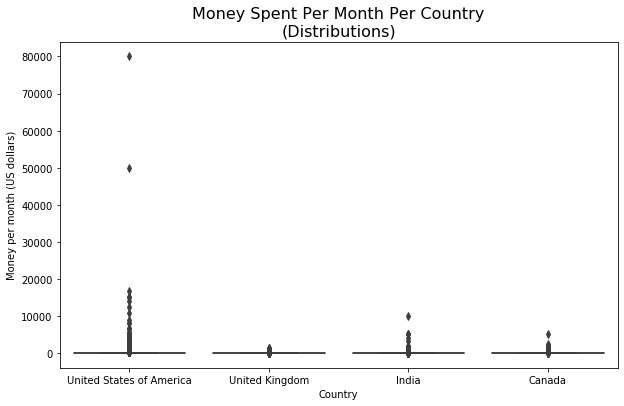

In [101]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(10,6))

sns.boxplot( ax = ax, x = 'CountryLive', y = 'spent_per_month', data = survey_4 )


plt.title('Money Spent Per Month Per Country\n(Distributions)', fontsize = 16)

plt.ylabel('Money per month (US dollars)')

plt.xlabel('Country')

#plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap

plt.show()


Zoom in:

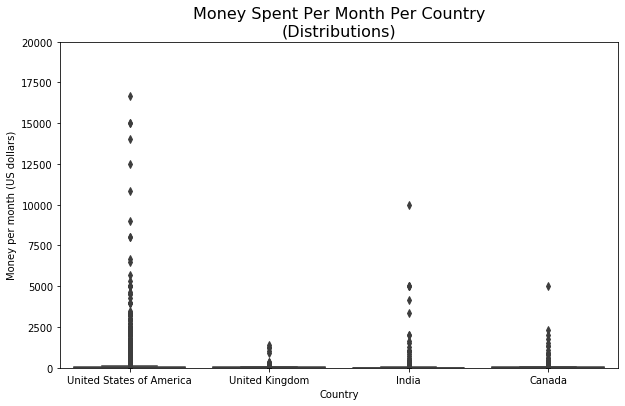

In [102]:
fig, ax = plt.subplots(figsize=(10,6))

sns.boxplot( ax = ax, x = 'CountryLive', y = 'spent_per_month', data = survey_4 )


plt.title('Money Spent Per Month Per Country\n(Distributions)', fontsize = 16)

plt.ylabel('Money per month (US dollars)')

plt.xlabel('Country')

#plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap

plt.ylim(0,20000)

plt.show()


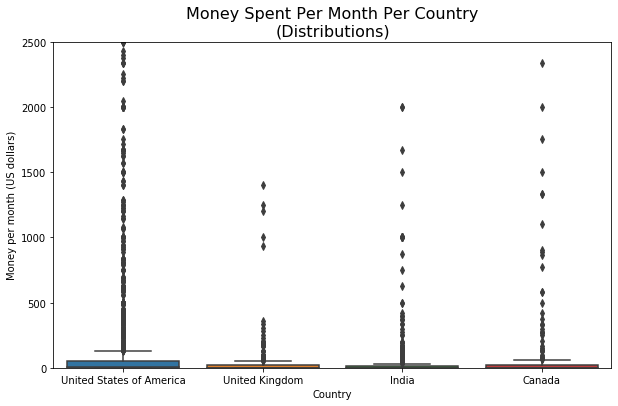

In [103]:
fig, ax = plt.subplots(figsize=(10,6))

sns.boxplot( ax = ax, x = 'CountryLive', y = 'spent_per_month', data = survey_4 )


plt.title('Money Spent Per Month Per Country\n(Distributions)', fontsize = 16)

plt.ylabel('Money per month (US dollars)')

plt.xlabel('Country')

#plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap

plt.ylim(0,2500)

plt.show()


### > India
Let's examine the data/rows associated with `spent_per_month` > 2,500 (USD):

In [118]:
above_2500_bool = survey_4['spent_per_month'] > 2500


In [107]:
india_outliers_1 = survey_4[ above_2500_bool & (survey_4['CountryLive'] == "India") ]

print(india_outliers_1.shape)

india_outliers_1


(6, 137)


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,spent_per_month
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,A stay-at-home parent or homemaker,NaN,70000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,30.0,d964ec629fd6d85a5bf27f7339f4fa6d,950a8cf9cef1ae6a15da470e572b1b7a,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,work for a startup,1.0,"User Experience Designer, Mobile Developer...",in an office with other developers,Bengali,"single, never married",20000.0,4.0,38d312a990,2017-03-10 10:22:34,2017-03-10 10:17:42,2017-03-10 10:24:38,2017-03-10 10:22:40,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,bachelor's degree,Computer Programming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,Not working and not looking for work,NaN,100000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,10.0,811bf953ef546460f5436fcf2baa532d,81e2a4cab0543e14746c4a20ffdae17c,NaN,0.0,0.0,0.0,NaN,I haven't decided,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,work for a multinational corporation,1.0,"Information Security, Full-Stack Web Developer...",no preference,Hindi,"single, never married",50000.0,15.0,4611a76b60,2017-03-10 10:48:31,2017-03-10 10:42:29,2017-03-10 10:51:37,2017-03-10 10:48:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1.0,bachelor's degree,Computer Science,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,Na

In [108]:
india_outliers_1[['AttendedBootcamp', 'BootcampFinish', 'BootcampName', 'MoneyForLearning', \
                  'MonthsProgramming', 'spent_per_month']]


,AttendedBootcamp,BootcampFinish,BootcampName,MoneyForLearning,MonthsProgramming,spent_per_month
1728,0.0,NaN,NaN,20000.0,4.0,5000.000000
1755,0.0,NaN,NaN,50000.0,15.0,3333.333333
7989,0.0,NaN,NaN,5000.0,1.0,5000.000000
8126,0.0,NaN,NaN,5000.0,1.0,5000.000000
13398,0.0,NaN,NaN,20000.0,2.0,10000.000000
15587,0.0,NaN,NaN,100000.0,24.0,4166.666667


It seems that none of the above participants attended a bootcamp. Since the actual question of the survey from `MoneyForLearning` was _"Aside from university tuition, about how much money have you spent on learning to code so far (in US dollars)?"_ , I think that these participants erroneously included their university tuition.

Let's remove the above outliers:

In [119]:
india_outliers_1.index

Int64Index([1728, 1755, 7989, 8126, 13398, 15587], dtype='int64')

In [120]:
survey_5 = survey_4.drop(india_outliers_1.index)
# or
#survey_5 = survey_4.drop(index = india_outliers_1.index)

print( survey_4.shape )

print( survey_5.shape )


(3915, 137)
(3909, 137)


### > US

In [121]:
us_data_bool = survey_5['CountryLive'] == "United States of America"

print(us_data_bool.sum())


2933


Text(0.5, 1.0, 'US')

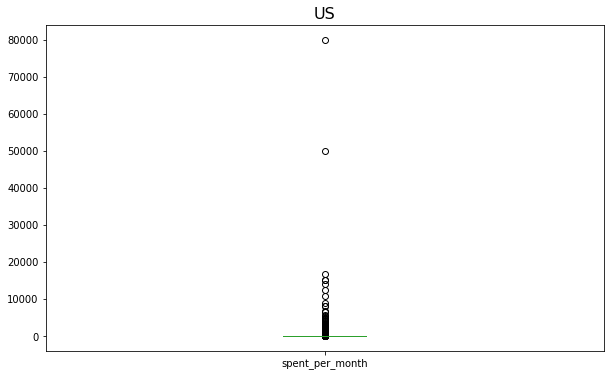

In [122]:
survey_5[us_data_bool]['spent_per_month'].plot.box(figsize=(10,6))

plt.title('US', fontsize = 16)

#plt.ylim(0,1000)


(0, 10000)

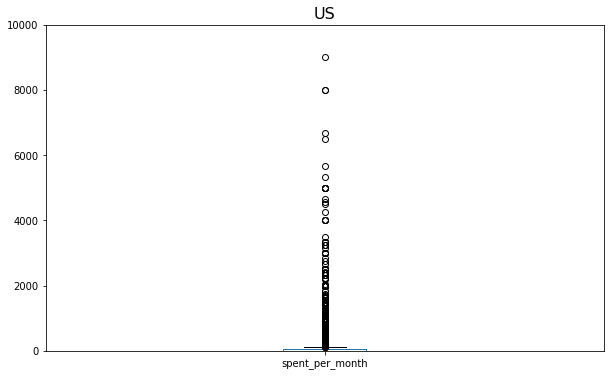

In [123]:
survey_5[us_data_bool]['spent_per_month'].plot.box(figsize=(10,6))

plt.title('US', fontsize = 16)

plt.ylim(0,10000)


(0, 6000)

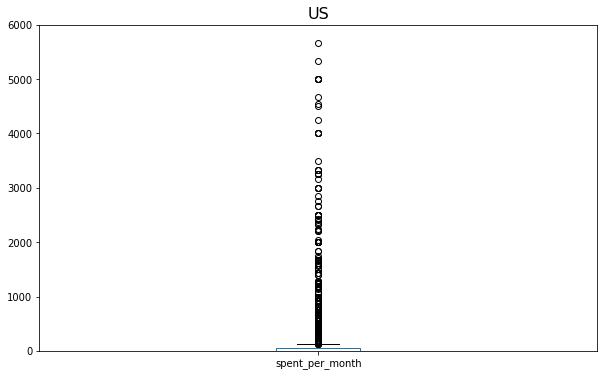

In [124]:
survey_5[us_data_bool]['spent_per_month'].plot.box(figsize=(10,6))

plt.title('US', fontsize = 16)

plt.ylim(0,6000)


In [125]:
us_above_5000_bool = (survey_5['spent_per_month'] > 5000) & \
                                    (survey_5['CountryLive'] == "United States of America")

us_above_5000_bool.sum()


15

In [126]:
us_outliers_1 = survey_5[us_above_5000_bool]

print( us_outliers_1.shape )


(15, 137)


In [127]:
us_outliers_1[['AttendedBootcamp', 'BootcampFinish', 'BootcampName', 'MoneyForLearning', \
                  'MonthsProgramming', 'spent_per_month']].sort_values(by=[ "AttendedBootcamp", \
                                                                            "MoneyForLearning" ])


,AttendedBootcamp,BootcampFinish,BootcampName,MoneyForLearning,MonthsProgramming,spent_per_month
16997,0.0,NaN,NaN,12500.0,1.0,12500.000000
17231,0.0,NaN,NaN,30000.0,2.0,15000.000000
3930,0.0,NaN,NaN,65000.0,6.0,10833.333333
7198,0.0,NaN,NaN,70000.0,5.0,14000.000000
14024,0.0,NaN,NaN,80000.0,1.0,80000.000000
16650,0.0,NaN,NaN,200000.0,12.0,16666.666667
718,1.0,0.0,The Coding Boot Camp at UCLA Extension,8000.0,1.0,8000.000000
9778,1.0,0.0,Grand Circus,8000.0,1.0,8000.000000
3184,1.0,1.0,We Can Code IT,9000.0,1.0,9000.000000
1222,1.0,0.0,The Iron Yard,13000.0,2.0,6500.000000


From the above 15 outliers we can see that:

- six participants did not attend a bootcamp; as a result, I will remove these rows.


- 9 participants attended to bootcamps. Note that they have been programming for no more than three months when they answered the survey. Since they probably paid a big amount of money for a bootcamp that was going to last for several months, the amount of money in `spent_per_month` is not realistic. As a result, I will remove these rows.

Let's remove the above outliers:

In [128]:
us_outliers_1.index

Int64Index([  718,  1222,  2478,  3145,  3184,  3930,  6805,  7198,  7505,
             9778, 13145, 14024, 16650, 16997, 17231],
           dtype='int64')

In [129]:
print( survey_5.shape )

survey_5.drop(us_outliers_1.index, inplace=True)
# or
#survey_5.drop(index = us_outliers_1.index,  inplace = True)

print( "\n", survey_5.shape )


(3909, 137)

 (3894, 137)


### > Canada

In [130]:
canada_above_2500_bool = (survey_5['spent_per_month'] > 2500) & \
                                    (survey_5['CountryLive'] == "Canada")

canada_above_2500_bool.sum()


1

In [131]:
canada_outliers_1 = survey_5[canada_above_2500_bool]

print( canada_outliers_1.shape )


(1, 137)


In [132]:
canada_outliers_1[['AttendedBootcamp', 'BootcampFinish', 'BootcampName', 'MoneyForLearning', \
                   'MonthsProgramming', 'spent_per_month']]

,AttendedBootcamp,BootcampFinish,BootcampName,MoneyForLearning,MonthsProgramming,spent_per_month
13659,1.0,0.0,Bloc.io,10000.0,2.0,5000.0


Let's take the same approach as we did for the US and remove this outlier:

In [133]:
canada_outliers_1.index

Int64Index([13659], dtype='int64')

In [134]:
print( survey_5.shape )

survey_5.drop(canada_outliers_1.index, inplace=True)
# or
#survey_5.drop(index = canada_outliers_1.index,  inplace = True)

print( "\n", survey_5.shape )


(3894, 137)

 (3893, 137)


### Next,
Let's calculate again the mean values for the `spent_per_month` per country:

In [135]:
grouped = survey_5.groupby('CountryLive')

In [136]:
grouped.size()

CountryLive
Canada                       239
India                        457
United Kingdom               279
United States of America    2918
dtype: int64

In [137]:
countries_mean = grouped.mean()

print( type(countries_mean) )


<class 'pandas.core.frame.DataFrame'>


In [138]:
countries_mean['spent_per_month']

CountryLive
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
United States of America    138.982678
Name: spent_per_month, dtype: float64

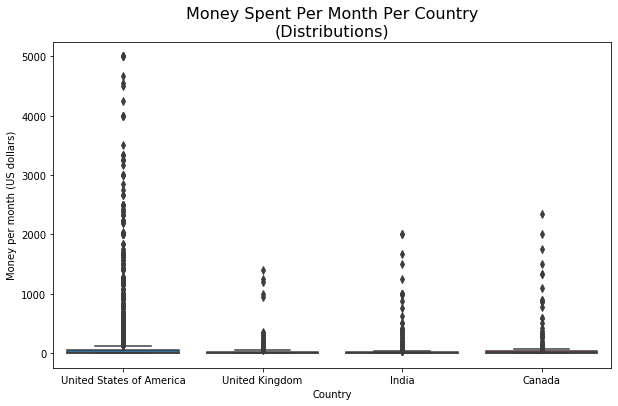

In [139]:
fig, ax = plt.subplots(figsize=(10,6))

sns.boxplot( ax = ax, x = 'CountryLive', y = 'spent_per_month', data = survey_5 )


plt.title('Money Spent Per Month Per Country\n(Distributions)', fontsize = 16)

plt.ylabel('Money per month (US dollars)')

plt.xlabel('Country')

#plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap

#plt.ylim(0,2500)

plt.show()


## Choosing the Two Best Markets

In [140]:
survey_5['CountryLive'].value_counts(dropna=False)

United States of America    2918
India                        457
United Kingdom               279
Canada                       239
Name: CountryLive, dtype: int64

In [141]:
survey_5['CountryLive'].value_counts(normalize=True) * 100

United States of America    74.955048
India                       11.739019
United Kingdom               7.166709
Canada                       6.139224
Name: CountryLive, dtype: float64

In [142]:
countries_mean['spent_per_month']

CountryLive
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
United States of America    138.982678
Name: spent_per_month, dtype: float64

Considering the results we've found so far, one country we should definitely advertise in is the US. There are a lot of new coders living there and they are willing to pay a good amount of money each month.

#### With regard to selecting the second country:

Although Canada has a higher (30%) average `spent_per_month` (money that participants spent per month, on average) than India, India could be a better choice because it practically doubles the number of potential customers against Canada.

We can think of different options when splitting the advertisement budget. For example:

- __Option A:__ 50% US, 30% India, and 20% Canada


- __Option B:__ 60% US, 20% India, and 20% Canada